https://en.wikipedia.org/wiki/Ordinary_least_squares


__Linear Modeling Function:__

</br>

${\displaystyle y_{i}=\beta _{1}x_{i1}+\beta _{2}x_{i2}+\cdots +\beta _{p}x_{ip}+\varepsilon _{i}}$

</br>

As a rule, the constant term is always included in the set of regressors $X$, say, by taking $x_{i1} = 1$ for all observations $i = 1, …, n$. The coefficient $\beta_1$ corresponding to this regressor is called the intercept.



__In Vector Form:__

</br>

${\displaystyle y_{i}=x_{i}^{T}\beta +\varepsilon _{i}\,}$

the $ε_i$'s are unobserved scalar random variables (errors) which account for influences upon the responses yi from sources other than the explanators $x_i$. 
$x_{i}$ is a column vector of the ith observations of all the explanatory variables.

__In Matrix Form:__

</br>

${\displaystyle {\hat {\boldsymbol {\beta }}}=(\mathbf {X} ^{\mathsf {T}}\mathbf {X} )^{-1}\mathbf {X} ^{\mathsf {T}}\mathbf {y}}$



${\displaystyle \mathbf {X} ={\begin{bmatrix}X_{11}&X_{12}&\cdots &X_{1p}\\X_{21}&X_{22}&\cdots &X_{2p}\\\vdots &\vdots &\ddots &\vdots \\X_{N1}&X_{N2}&\cdots &X_{Np}\end{bmatrix}},\qquad {\boldsymbol {\beta }}={\begin{bmatrix}\beta _{1}\\\beta _{2}\\\vdots \\\beta _{p}\end{bmatrix}},\qquad \mathbf {y} ={\begin{bmatrix}y_{1}\\y_{2}\\\vdots \\y_{N}\end{bmatrix}}.}$


N is the number of observations and p is the number of features, predictors, independent variables, regressors, etc...
The terms representing the variables in the training data set have many names. 

$\beta$ is the coefficient vector.

$y$ is the response vector, or vector of dependent variables. When you are training a model, $y$ is the response that that model should be able to closely predict.  

#### The below notes are from Wikipedia, so make sure they match the book. 

Suppose $\beta$ is a "candidate" value for the parameter vector $\boldsymbol{\beta}$. The quantity $y_i − x_i^T \beta$, called the residual for the _i_th observation, measures the vertical distance between the data point ($x_i$, $y_i$) and the hyperplane $y = x^T \beta$, and thus assesses the degree of fit between the actual data and the model. The sum of squared residuals (SSR) (also called the error sum of squares (ESS) or residual sum of squares (RSS)) is a measure of the overall model fit:


${\displaystyle RSS(\beta)=\sum _{i=1}^{N}(y_{i}-x_{i}^{\mathrm {T} }\beta)^{2} = (\boldsymbol{y}-\boldsymbol{X}\beta)^{\mathrm {T} }(\boldsymbol{y}-\boldsymbol{X}\beta)}$

The goal is to find the set of coefficients $\beta$ that minimize the residual sum of squares (RSS). 



${\displaystyle RSS(\beta)= (\boldsymbol{y}-\boldsymbol{X}\beta)^{\mathrm {T} }(\boldsymbol{y}-\boldsymbol{X}\beta)}$

${\displaystyle {\hat {\boldsymbol {\beta }}}=(\mathbf {X} ^{\mathsf {T}}\mathbf {X} )^{-1}\mathbf {X} ^{\mathsf {T}}\mathbf {y}}$

```



```
# Hogg's Notation.
## In Hogg's paper on linear regresstion (https://arxiv.org/pdf/1008.4686.pdf) he uses A instead of X for the features matrix. Moving Forward I will also adopt A instead of X, so replace A for X in all the equations above. 


```

```
# Code Shortcuts:

`np.linalg.inv(A.T * np.linalg.inv(C) * A)` 
 is the same as 
 `(A.T * C**-1 * A)**-1`
 
 
`A * A.T`
 is the same as 
`np.dot(A, A.T)`

# Read in Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from Zoldak.Math.tools import to_log

In [2]:
data = pd.read_csv(('/Users/kimzoldak/Github/GRB_Hubble_Diagram/data/'
                    'Band_13_GBM+LAT__22_GBMconstrained.txt'), 
                   sep='\t')

data = data[data.trigger.map(lambda x: x != 'bn090510016')]  # remove short burst
data.index = range(0, len(data))

df = pd.DataFrame()
df['eiso'] = data['eiso']/1E52
df['eiso_err'] = data.loc[:, ['eiso_err_low', 'eiso_err_up']].apply(np.mean, 1)
df['eiso_err'] = df['eiso_err']/1E52
df['epeakRest'] = data['epeakRest']
df['epeakRest_err'] = data.loc[:, ['epeakRest_err_low', 'epeakRest_err_up']].apply(np.mean, 1)

x,xerr = to_log(df['eiso'], df['eiso_err'], which='average', errTypeReturn='moe')
y,yerr = to_log(df['epeakRest'], df['epeakRest_err'], which='average', errTypeReturn='moe')


<ErrorbarContainer object of 3 artists>

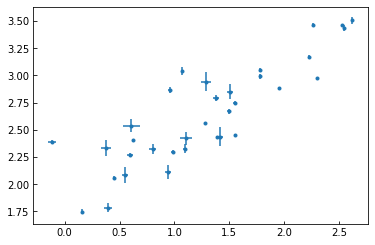

In [3]:
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='.')

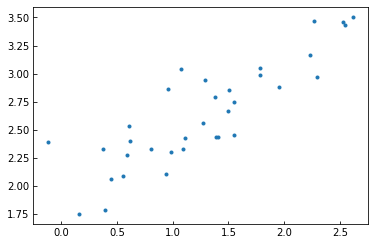

In [163]:
plt.plot(x, y, '.')

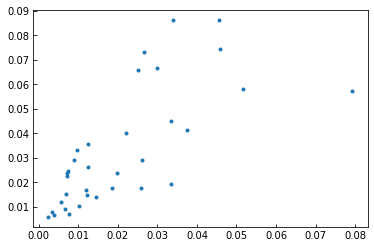

In [164]:
plt.plot(xerr, yerr, '.')

[]

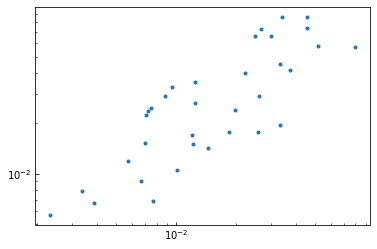

In [165]:
plt.plot(xerr, yerr, '.')
plt.loglog()

## A is the features matrix

In [4]:
A = np.matrix([np.ones(len(x)), x]).T  # shape(34, 2)

In [5]:
A

matrix([[ 1.        ,  2.54185491],
        [ 1.        ,  2.61299381],
        [ 1.        ,  1.07236324],
        [ 1.        ,  2.52902616],
        [ 1.        ,  2.29584438],
        [ 1.        ,  0.95559486],
        [ 1.        ,  0.377605  ],
        [ 1.        ,  1.95587216],
        [ 1.        ,  1.7817039 ],
        [ 1.        ,  2.22798906],
        [ 1.        ,  1.77951585],
        [ 1.        ,  1.27529528],
        [ 1.        ,  1.50577426],
        [ 1.        ,  1.5529516 ],
        [ 1.        ,  1.37900051],
        [ 1.        ,  0.6214454 ],
        [ 1.        ,  1.38880257],
        [ 1.        ,  0.59277242],
        [ 1.        ,  0.16047497],
        [ 1.        ,  0.80329796],
        [ 1.        ,  0.60744442],
        [ 1.        ,  1.10608739],
        [ 1.        , -0.11498411],
        [ 1.        ,  1.41045805],
        [ 1.        ,  0.93947386],
        [ 1.        ,  0.39290272],
        [ 1.        ,  1.55206348],
        [ 1.        ,  0.551

In [6]:
N = len(A)  # number of data points
N

34

## y is the response matrix 

In [7]:
y = y

In [8]:
y

array([3.43646946, 3.50643145, 3.04247935, 3.45950575, 2.97325762,
       2.86648647, 2.33270509, 2.88375434, 2.99229292, 3.16820682,
       3.05053867, 2.55857095, 2.85059   , 2.457404  , 2.79032391,
       2.40343558, 2.43401211, 2.27210394, 1.74770618, 2.3255078 ,
       2.53830136, 2.42366128, 2.38899218, 2.43898041, 2.11096192,
       1.78440188, 2.74683131, 2.08541495, 3.46699154, 2.94254254,
       2.32751543, 2.06024854, 2.66904495, 2.30113692])

In [9]:
np.vstack(y)

array([[3.43646946],
       [3.50643145],
       [3.04247935],
       [3.45950575],
       [2.97325762],
       [2.86648647],
       [2.33270509],
       [2.88375434],
       [2.99229292],
       [3.16820682],
       [3.05053867],
       [2.55857095],
       [2.85059   ],
       [2.457404  ],
       [2.79032391],
       [2.40343558],
       [2.43401211],
       [2.27210394],
       [1.74770618],
       [2.3255078 ],
       [2.53830136],
       [2.42366128],
       [2.38899218],
       [2.43898041],
       [2.11096192],
       [1.78440188],
       [2.74683131],
       [2.08541495],
       [3.46699154],
       [2.94254254],
       [2.32751543],
       [2.06024854],
       [2.66904495],
       [2.30113692]])

In [10]:
print(A.shape)            # (34, 2)
print(y.shape)            # (34, )
print(np.vstack(y).shape) # (34, 1)

(34, 2)
(34,)
(34, 1)


#### The diagonal of the covariance matrix are the $(y_{err,i}^2)$, or $\sigma_{y,i}^2$ 

In [11]:
C = np.zeros(shape=(N,N))
C = np.asmatrix(C)

np.fill_diagonal(C, yerr**2)

C

matrix([[0.00085582, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.00108717, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.00125941, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.00022282, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.00057234,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.0002867 ]])

#### Hogg's eqn 5

The best-fit values for the parameters $m$ and $b$ are just the components of a column vector found by:

In [12]:
(A.T * C**-1 * A)**-1

matrix([[ 4.32358178e-05, -2.25435877e-05],
        [-2.25435877e-05,  1.37248402e-05]])

OR

In [13]:
np.dot(np.dot(A.T, C**-1), A)**-1

matrix([[ 4.32358178e-05, -2.25435877e-05],
        [-2.25435877e-05,  1.37248402e-05]])

OR

In [14]:
np.linalg.inv(np.dot(np.dot(A.T, np.linalg.inv(C)), A))

matrix([[ 4.32358178e-05, -2.25435877e-05],
        [-2.25435877e-05,  1.37248402e-05]])

## Estimates of linear coefficients; intercept and slope.
## $[A^T C^{-1} A]^{-1} [A^T C^{-1} y]$

#### Without a covariance matrix it is:

In [15]:
((A.T * A)**-1) * A.T * np.vstack(y) # equation 3.6

matrix([[1.93207633],
        [0.55595839]])

#### With a covariance matrix:

In [17]:
beta = ((A.T * C**-1 * A)**-1) * A.T * C**-1 * np.vstack(y) # equation 3.6
print(beta)

[[1.8836383 ]
 [0.53134399]]


**Notice they are different values!**

## Hogg calls this vector X, and the Y values given the model are thus:  
## Y = AX

In [18]:
X = ((A.T * C**-1 * A)**-1) * A.T * C**-1 * np.vstack(y)

In [19]:
Y = A*X
Y

matrix([[3.23423763],
        [3.27203686],
        [2.45343206],
        [3.22742115],
        [3.10352141],
        [2.39138789],
        [2.08427645],
        [2.92287922],
        [2.83033596],
        [3.0674669 ],
        [2.82917335],
        [2.56125879],
        [2.68372241],
        [2.7087898 ],
        [2.61636194],
        [2.21383958],
        [2.6215702 ],
        [2.19860437],
        [1.96890571],
        [2.31046584],
        [2.20640025],
        [2.47135119],
        [1.82254219],
        [2.63307671],
        [2.38282209],
        [2.0924048 ],
        [2.70831791],
        [2.17675815],
        [3.0858187 ],
        [2.56793669],
        [2.46583739],
        [2.1235074 ],
        [2.67774099],
        [2.40666769]])

OR

In [20]:
Y = A*beta
Y

matrix([[3.23423763],
        [3.27203686],
        [2.45343206],
        [3.22742115],
        [3.10352141],
        [2.39138789],
        [2.08427645],
        [2.92287922],
        [2.83033596],
        [3.0674669 ],
        [2.82917335],
        [2.56125879],
        [2.68372241],
        [2.7087898 ],
        [2.61636194],
        [2.21383958],
        [2.6215702 ],
        [2.19860437],
        [1.96890571],
        [2.31046584],
        [2.20640025],
        [2.47135119],
        [1.82254219],
        [2.63307671],
        [2.38282209],
        [2.0924048 ],
        [2.70831791],
        [2.17675815],
        [3.0858187 ],
        [2.56793669],
        [2.46583739],
        [2.1235074 ],
        [2.67774099],
        [2.40666769]])

You want to solve the equation
$Y = AX $, but you can't because that equation is over-constrained.
So you weight everything with the inverse of the covariance matrix ($C^{-1}$ or `C**-1`) (as you would if you were doing, say, a weighted average), and then left-multiply everything by $A^T$ to reduce the dimensionality, and then equation $[A^T C^{-1} A]^{-1} [A^T C^{-1} y]$ is the solution of that reduced-dimensionality equation. This procedure is not arbitrary; it minimizes an objective function 
("chi-squared"), which is the total squared error, scaled by the uncertainties, or"

$\chi^2 = \sum^N_{i=-1} \frac{[y_i - f(x_i)]^2}{\sigma_{y_i}^2} = [Y-AX]^T C^{-1} [Y-AX]$

or 

$\chi^2 = \sum^N_{i=-1} \frac{[y_i - y_{model,i}]^2}{\sigma_{y_i}^2} = [Y-AX]^T C^{-1} [Y-AX]$


The probability density function for a standard normal distribution is:

${\displaystyle f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}$

${\displaystyle f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}} \exp\left[ -\frac{(x-\mu)^2}{2\sigma^2} \right] }$

OR

${\displaystyle {\frac {1}{\sqrt {2\pi \sigma ^{2}}}} \exp\left[ -\frac{1}{2}\frac{(y-y_{model})^2}{\sigma^2} \right] }$

Thus, chi-squared minimization comes from the normal distribution. 

## In Eqns 16-18 of Kelly 2007:

$\frac{1}{2\pi |V_{k,i}|^{1/2}} \times \exp\left[ -\frac{1}{2}(z_i - \zeta_k)^T V_{k,i}^{-1} (z_i - \zeta_k) \right]$

where

$z_i=(y,x)$

$\zeta_k = (\alpha + \beta\mu_k, \mu_k)$

and 

$V_{k,i} = 
\left(
\begin{matrix}
\beta^2 \tau_k^2 + \sigma^2 + \sigma_{y,i}^2 & \beta \tau_k^2 + \sigma_{xy,i} \\
\beta \tau_k^2 + \sigma_{xy,i} & \tau_k^2 + \sigma_{x,i}^2
\end{matrix}
\right)
$

### Focusing on the exponential term in the normal distribution we have:

$\exp\left[-\frac{1}{2} \left((\text{data} - \text{model})^T \  Cov^{-1} \ (\text{data} - \text{model})\right) \right]$

which from the $\chi^2$ equation this is $\exp[\frac{1}{2}\chi^2] = \exp\left[\frac{1}{2} \left[ [Y-AX]^T C^{-1} [Y-AX] \right]\right]$

where $AX$ is the model. This should make sense since $Y=AX$ gave us the y-values given the model's parameters (that are given by the $X$ matrix). I don't like calling it the $X$ matrix becuase it makes you think it is the xdata. It is dependent on the xdata, but is not the xdata alone. So $Y = AX$ or $Y = A\beta$, as I prefer. Recall that $X$ (or $\beta$) is a matrix of the intercept and slope.

This should confirm now that Kelly 2007's (equation 16) is $\frac{1}{2 \pi \sqrt{Cov} }\exp\left[-\frac{1}{2} \left((\text{data} - \text{model})^T \  Cov^{-1} \ (\text{data} - \text{model})\right) \right]$

```


```
$\chi^2 = [Y-AX]^T C^{-1} [Y-AX]$

This equation yields the values of slope and intercept that minimizes $\chi^2$. 

Technically the $Y$ should be $ydata$, not the $ymodel$. So we will use lower case $y$, which is our data.

```


```

In [143]:
beta = ((A.T * C**-1 * A)**-1) * A.T * C**-1 * np.vstack(y)
Y = A * beta

In [144]:
beta

matrix([[1.8836383 ],
        [0.53134399]])

In [159]:
# $\chi^2 = [y-AX]^T C^{-1} [y-AX]$
chi_sqrd = (np.vstack(y) - A*beta).T * C**-1 * (np.vstack(y) - A*beta)
chi_sqrd

matrix([[6599.40126548]])

Conceptually, $\chi^2$ is like a metric distance in the data space. This, of course, is
only one possible meaning of the phrase "best-fit"; that issue is addressed more below.

When the uncertainties are Gaussian and their variances \sigma_{y,i} are correctly estimated, the matrix $[A^T C^{-1} A]^{-1}$ that appears in equation (5) is
just the covariance matrix *(Gaussian uncertainty -- uncertainty not error(variances on the diagonal, covariances off the diagonal)* for the parameters
in X. 

In [161]:
(A.T * C**-1 * A)**-1

matrix([[ 4.32358178e-05, -2.25435877e-05],
        [-2.25435877e-05,  1.37248402e-05]])

# Plot the models

In [176]:
beta_wo_cov = ((A.T * A)**-1) * A.T * np.vstack(y)
beta_w_cov = ((A.T * C**-1 * A)**-1) * A.T * C**-1 * np.vstack(y)
ymodel_wo_cov = A * beta_wo_cov
ymodel_w_cov = A * beta_w_cov

In [177]:
print(beta_wo_cov)
print(beta_w_cov)

[[1.93207633]
 [0.55595839]]
[[1.8836383 ]
 [0.53134399]]


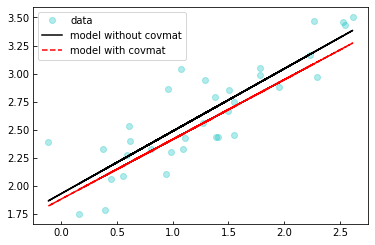

In [178]:
plt.plot(x, y, 'co', alpha=0.3, label='data')  # data for y
plt.plot(x, ymodel_wo_cov, color='k', ls='-', label='model without covmat')  
plt.plot(x, ymodel_w_cov, color='red', ls='--', label='model with covmat')
plt.legend(loc=0)

N is already defined, but we can just define it again here.

# Variance and the Variance-Covariance Matrix

In [180]:
N,p = A.shape  # number of observations, number of features (aka predictors)
N,p

(34, 2)

In [181]:
# degrees of freedom
dof = N-p-1
print(dof)

31


In [182]:
def variance(dof, y, ymodel):
    ymod = np.asarray(ymodel.flatten())[0]
    var = (1./dof)*((y - ymod)**2).sum()
    return var

def variance_covariance_matrix(A, dof=None, y=None, ymodel=None, var=None):
    if var is None:
        var = variance(dof, y, ymodel)
    return ((A.T * A)**-1) * var
    

In [198]:
COVARMAT = (A.T * C**-1 * A)**-1
COVARMAT

matrix([[ 4.32358178e-05, -2.25435877e-05],
        [-2.25435877e-05,  1.37248402e-05]])

In [199]:
VARCOVARMAT = variance_covariance_matrix(A, dof, y, ymodel_w_cov)
VARCOVARMAT

matrix([[ 0.00848007, -0.00507543],
        [-0.00507543,  0.00397324]])

In [202]:
var = variance(dof, y, ymodel_w_cov)
var

0.0678880022381801

In [203]:
variance_covariance_matrix(A, var=var)

matrix([[ 0.00848007, -0.00507543],
        [-0.00507543,  0.00397324]])

In [227]:
np.sqrt(COVARMAT)

/Users/kimzoldak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


matrix([[0.00657539,        nan],
        [       nan, 0.00370471]])

The full uncertainty covariance matrix for each data point is given by
$
\left(
\begin{matrix}
\sigma_x^2 & \rho_{xy}\sigma_x \sigma_y \\
\rho_{xy}\sigma_x \sigma_y  & \sigma_y^2
\end{matrix}
\right)
$

In [170]:
var

0.0678880022381801

In [171]:
variance_covariance_matrix(A, dof, y, ymodel_wo_cov)

matrix([[ 0.00756417, -0.00452725],
        [-0.00452725,  0.00354411]])

In [172]:
var = variance(dof, y, ymodel_wo_cov)

In [173]:
variance_covariance_matrix(A, var=var)

matrix([[ 0.00756417, -0.00452725],
        [-0.00452725,  0.00354411]])

In [174]:
var

0.06055566009953621

In [61]:
sigma_squared = lambda dof, y, ymod: (1./dof)*np.sum( (y - np.asarray(ymod.flatten()))**2 )
variance_beta = lambda sigsqrd: ((A.T * A)**-1) * sigsqrd 

In [80]:
sigsq = sigma_squared(dof, y, ymodel_wo_cov)
sigsq

0.06055566009953621

In [93]:
np.var(np.asarray(ymodel_wo_cov.flatten()))

0.15532942486759438

In [86]:
np.var(ymodel_wo_cov)

0.15532942486759438

In [81]:
variance_beta(sigsq)

matrix([[ 0.00756417, -0.00452725],
        [-0.00452725,  0.00354411]])

In [82]:
sigsq = sigma_squared(dof, y, ymodel_w_cov)
sigsq

0.0678880022381801

In [83]:
variance_beta(sigsq)

matrix([[ 0.00848007, -0.00507543],
        [-0.00507543,  0.00397324]])

### Residual Sum of Squares (RSS)
These are the squared differences between the true y-data values and the estimated y values given the model. 

**Keep in mind, the variables y and ydata are the same thing; the y-axis data of the data points. We just gave it two names.**

In [ ]:
# y_hat is in matrix form, make y_hat into a flattened array.
y_hat_arr = np.asarray(y_hat.flatten())

residuals = (y - y_hat_arr ) # vertical distances between the model and the y-data

In [ ]:
# RSS = sum(residuals**2)
RSS = np.sum( (y - y_hat_arr )**2 )
print(RSS)

In [ ]:
# RSS IN MATRIX FORMAT
((np.vstack(y) - X * beta).T) * (np.vstack(y) - X * beta)  # equation 3.3

### Plot with $\hat{y}$ and residuals.

In [ ]:
plt.plot(xdata, y, 'ro', alpha=0.3)  # data for y
plt.plot(xdata, y_hat)  # model estimate for y
plt.vlines(xdata, y, y-residuals, color='grey', alpha=0.75)

In [ ]:
residuals

### First Derivative of the RSS

In [ ]:
-2 * X.T * (np.vstack(y) - X*beta)   # equation 3.4

### Second Derivative of the RSS

In [ ]:
2 * X * X.T     # equation 3.4

### Degrees of Freedom
n_observations - n_predictors - 1

In [ ]:
N,p = X.shape  # number of observations, number of features (aka predictors)

degrees_of_freedom = N-p-1
print(degrees_of_freedom)

### Variance

In [ ]:
sigma_squared = (1./(N-p-1)) * np.sum( (y - y_hat_arr )**2 )

print(sigma_squared)

In [ ]:
# OR 
RSS/degrees_of_freedom

In [ ]:
# sigma_squared IN MATRIX FORM:
(1./(N-p-1)) * ( ((np.vstack(y) - X * beta).T) * (np.vstack(y) - X * beta) ) 

### Variance-Covariance Matrix

In [ ]:
variance_beta = ((X.T * X)**-1) * sigma_squared  # equation 3.8
print(variance_beta)

### Standard Error on the parameters. 0.459 is on $\beta_0$ and 0.0027 is on $\beta_1$

In [ ]:
# standard error of the parameters are the diago elements of this matrix.
np.sqrt(variance_beta)

In [ ]:
SE_mat = np.sqrt(variance_beta)
print(SE_mat)

In [ ]:
# get rid of the nans
standard_error = SE_mat[ ~np.isnan(SE_mat) ]
print(standard_error)

### Confidence Intervals
$1\sigma$, $2\sigma$, and $3\sigma$ confidence intervals are calculated using:

$\hat{\beta_0} \pm 1 \ SE(\hat{\beta_0})$ 

$\hat{\beta_0} \pm 2 \ SE(\hat{\beta_0})$ 

$\hat{\beta_0} \pm 3 \ SE(\hat{\beta_0})$ 

and 

$\hat{\beta_1} \pm 1 \ SE(\hat{\beta_1})$ 

$\hat{\beta_1} \pm 2 \ SE(\hat{\beta_1})$ 

$\hat{\beta_1} \pm 3 \ SE(\hat{\beta_1})$ 


where 2 is the z-score for a 95% confidence interval. 

In [ ]:
beta

In [ ]:
beta - 1*SE_mat, beta + 1*SE_mat, \
beta - 2*SE_mat, beta + 2*SE_mat, \
beta - 3*SE_mat, beta + 3*SE_mat

In [ ]:
standard_error

In [ ]:
np.asarray(beta.flatten())

In [ ]:
beta.flatten() - 1*standard_error, beta.flatten() + 1*standard_error

In [ ]:
beta.flatten() - 2*standard_error, beta.flatten() + 2*standard_error

In [ ]:
beta.flatten() - 3*standard_error, beta.flatten() + 3*standard_error

### Residual Standard Error

In [ ]:
RSE = np.sqrt(RSS/(N-2))
print(RSE)

### $R^2$ Statistic
$R^2 = \frac{TSS-RSS}{TSS} = 1-\frac{RSS}{TSS}$,

where

$TSS = \sum{(y_i - \bar{y})^2}$ is the total sum of squares. TSS measures the total variance int he response Y, and can be thought of as the amount of variability inherent in the response before regression in performed. In contrast, RSS measures the amount of variability that is left unexplained after performing the regression. Hence, TSS-RSS measures the amount of variability in the response that is explained (or removed) by performing the regression, and $R^2$ measures the proportion of variability in Y that can be explained using X. An $R^2$ close to 1 indicates a large proportion of the variability in the response has been explained by the regression. A number near 0 indicates the regression did not explain much of the variability in the response. This may occur when the linear model is wrong, the inherent error $\sigma^2$ is high, or both. 

In [ ]:
TSS = np.sum((ydata - ydata.mean())**2)

In [ ]:
R_squared = 1-(RSS/TSS)
print(R_squared)

Just under 2/3rds of the variability in sales is explained by a linear regression on TV. 

### Adjusted $R^2$

In [ ]:
R_squared_adjusted = 1 - ( (RSS/(N-p)) / (TSS/(N-1)) )
print(R_squared_adjusted)

### Mean Squared Error

In [ ]:
MSE = RSS/N
print(MSE)

### Root Mean Squared Error

In [ ]:
RMSE = np.sqrt(RSS/N)
print(RMSE)

In [ ]:
# THESE SHOULD BE VERY CLOSE IF NOT EXACTLY THE SAME.
print(RMSE, np.std(residuals))

In [ ]:
RMSE == np.std(residuals)

### t-statistic
$t=\frac{\hat{\beta_0}-0}{\text{SE}(\hat{\beta_0})}$

and 

$t=\frac{\hat{\beta_1}-0}{\text{SE}(\hat{\beta_1})}$

In [ ]:
SE_beta0 = np.asarray(standard_error)[0][0]
SE_beta1 = np.asarray(standard_error)[0][1]

beta0 = np.asarray(beta.flatten())[0][0]
beta1 = np.asarray(beta.flatten())[0][1]


In [ ]:
tstat_beta0 = (beta0 - 0)/(SE_beta0)
print(tstat_beta0)

In [ ]:
tstat_beta1 = (beta1 - 0)/(SE_beta1)
print(tstat_beta1)

### Common forms for the Log-Likelihood Equation of a Normal Distribution.

${\displaystyle \log {\Big (}{\mathcal {L}}(\mu ,\sigma ){\Big )}=-{\frac {\,n\,}{2}}\log(2\pi \sigma ^{2})-{\frac {1}{2\sigma ^{2}}}\sum _{i=1}^{n}(\,x_{i}-\mu \,)^{2}}$

$\ln(f) = -\frac{1}{2} n \ln(2 \pi) - n\ln \sigma - \frac{\sum(x_i - \mu)^2}{2\sigma^2}$

Unfortunately, these are confusing.

The $(x_i - \mu)^2$ appears to be the $ith$ element of the xdata and $\mu$ the mean of that data. However, this is wrong!! 

$(x_i - \mu)^2$ would be better written as $(y_i - \hat{y_i})$.

$y_i$ is the y-axis values of the real data.

$\hat{y_i}$ are the estimates of each $y_i$, given the linear model. 

Another confusing aspect of these equations; $\sigma$ is NOT the sigma we have been using. $\sigma$ is the standard deviation of the residuals; std($y_i - \hat{y_i}$). Instead of using $\sigma$, we will use $s$. 

We are trying to estimate the true model $f$ that produced the true datapoints ($x_i$, $y_i$). If we accurately estimate $f$ with no trend of overestimating or underestimating the dependent variable (i.e., no bias), then the differences between the true values and our estimates of them will be normally distributed about the model. Thus, ($y_i - \hat{y_i}$) will be normally distributed about the linear model. 

($y_i - \hat{y_i}$) are the vertical offsets between the model and the true data, since y is the dependent variable and the y-axis is the vertical axis. They are the fit residuals, or the errors of the fit. It should now make sense that $s=\text{std}(y_i - \hat{y_i}) = \text{std}(residuals)$ is also the standard deviation of the normal distribution that the data ($x_i$, $y_i$) are scattered about the true model $f$. 

*NOTE: Taking a look at the linear fit to the data we use in this notebook example, there is clearly a bias and the residuals are NOT normally distributed about the model. We will discuss that at a later time when covering the topic of bias.*

https://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/06/lecture-06.pdf

### Log-Likelihood Equation we will use:

$\log (f) = -\frac{n}{2} \log(2 \pi) - n \log(s) - \frac{1}{2s^2}\sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i))^2$

OR

$\log (f) = -\frac{n}{2} \log(2 \pi s^2) - \frac{1}{2s^2}\sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i))^2$

Notice that $(\beta_0 + \beta_1 x_i)$ is $\hat{y_i}$, the estimates of the ydata. 

Thus,

$\sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i))^2 \ \ \ = \ \ \ \sum_{i=1}^{n} (y_i - \hat{y_i})^2$, 

which is the residual sum of squares, the $RSS$.

In [ ]:
s = np.std(residuals)
LOGLIKE = -0.5*N*np.log(2.0*np.pi*(s**2)) - (np.sum(residuals**2)/(2.0*(s**2)))
print(LOGLIKE)

### AIC and BIC

In [ ]:
AIC = -2.* LOGLIKE + 2.*p
print(AIC)
BIC = -2.* LOGLIKE + np.log(N)*p
print(BIC)

[Projection Matrix](https://en.wikipedia.org/wiki/Projection_matrix)

[Identity Matrix](https://en.wikipedia.org/wiki/Identity_matrix)

${\displaystyle \mathbf {\hat {y}} =\mathbf {P} \mathbf {y} }$

$P = X(X^TX)^{−1}X^T$

In [ ]:
projection_matrix = (X*(X.T*X)**-1) * X.T
print(projection_matrix)

In [ ]:
identity_matrix = np.identity(n=len(X))
print(identity_matrix)

In [ ]:
residual_maker_matrix = identity_matrix - projection_matrix
print(residual_maker_matrix)

M is the "residual maker matrix"

M = I − P  

I is the identity matrix and P is the projection matrix. Puts a hat onto y.

In [ ]:
N,p = X.shape
M = residual_maker_matrix
s_squared = (np.vstack(y).T * M * np.vstack(y))/(N-p)

print(s_squared)  # appears to be same as RSS/(n-p)

print(RSS/(N-p))